# 动态规划

下图是一个格子迷宫，这个格子迷宫可以用一个简单的 MDP 来描述。其中我们可以用智能体的位置表示状态。在每个格子处，智能体可以做出四个动作: North, West, South, East。所有的动作都能导致智能体以确定性的形式改变位置。其中 A 和 B 是两个特殊状态，奖励的定义如下, 其中  γ  = 0.9:

- 除了 A、B 外，任何想要走出边界的动作都会撞墙，从而导致位置不变，获得-1的奖励
- 除 A、B 外，任何非撞墙的动作都会获得0的奖励
- 在 A 处无论做什么动作，都会跳转到 A′，并获得 +10 的奖励
- 在 B 处无论做什么动作，都会跳转到 B′，并获得 +5 的奖励
- 我们需要实现以下功能, 假设值函数初始化为0

实现环境逻辑
- 使用迭代式策略评价算法，计算随机策略的值函数。计算完后用表格的形式画出来
- 使用策略迭代算法，计算最优值函数。并画出最优值函数和最优策略，并画出收敛曲线
- 使用值迭代算法，计算最优值函数。并画出收敛曲线，和策略迭代对比
- 使用就地 (in-place) 的值迭代算法，计算最优值函数。并画出收敛曲线, 与前两者对比

(提示:环境部分代码已给;由于好策略的每一个状态的值函数都要大于坏的策略，所以收敛曲线的一种绘制方式画出平均值函数-迭代步数的曲线)

![](http://ww1.sinaimg.cn/large/006tNc79ly1g4vtpd3ro6j30f10e6gmq.jpg)


In [1]:
import numpy as np
from code3_DP import Env, value_evaluate, policy_iteration, value_iteration, inplace_value_iteration

WORLD_SIZE = 5
N_ACTIONS = 4  # [North, South, West, East]
gamma = 0.9

In [2]:
random_policy = np.full((WORLD_SIZE, WORLD_SIZE, N_ACTIONS),
                        1. / N_ACTIONS, dtype=np.float32)
# 可以打印随机策略所对应的表格
for i in range(WORLD_SIZE):
    for j in range(WORLD_SIZE):
        print("State: ({},{}) - action prob{}".format(i, j, random_policy[i, j]))

State: (0,0) - action prob[0.25 0.25 0.25 0.25]
State: (0,1) - action prob[0.25 0.25 0.25 0.25]
State: (0,2) - action prob[0.25 0.25 0.25 0.25]
State: (0,3) - action prob[0.25 0.25 0.25 0.25]
State: (0,4) - action prob[0.25 0.25 0.25 0.25]
State: (1,0) - action prob[0.25 0.25 0.25 0.25]
State: (1,1) - action prob[0.25 0.25 0.25 0.25]
State: (1,2) - action prob[0.25 0.25 0.25 0.25]
State: (1,3) - action prob[0.25 0.25 0.25 0.25]
State: (1,4) - action prob[0.25 0.25 0.25 0.25]
State: (2,0) - action prob[0.25 0.25 0.25 0.25]
State: (2,1) - action prob[0.25 0.25 0.25 0.25]
State: (2,2) - action prob[0.25 0.25 0.25 0.25]
State: (2,3) - action prob[0.25 0.25 0.25 0.25]
State: (2,4) - action prob[0.25 0.25 0.25 0.25]
State: (3,0) - action prob[0.25 0.25 0.25 0.25]
State: (3,1) - action prob[0.25 0.25 0.25 0.25]
State: (3,2) - action prob[0.25 0.25 0.25 0.25]
State: (3,3) - action prob[0.25 0.25 0.25 0.25]
State: (3,4) - action prob[0.25 0.25 0.25 0.25]
State: (4,0) - action prob[0.25 0.25 0.2

In [3]:
env = Env()
random_V = value_evaluate(random_policy, env)
print(random_V)

[[ 3.308997    8.789292    4.42762     5.322368    1.4921793 ]
 [ 1.5215887   2.9923184   2.2501407   1.9075724   0.5474032 ]
 [ 0.05082303  0.73817116  0.6731138   0.3581868  -0.4031406 ]
 [-0.97359174 -0.43549493 -0.3548817  -0.58560455 -1.1830745 ]
 [-1.8577001  -1.3452307  -1.2292668  -1.4229176  -1.9751785 ]]


In [4]:
V, mean_values, policy, run_times = policy_iteration()

In [5]:
V

array([[21.977484, 24.419426, 21.977484, 19.419426, 17.477484],
       [19.779736, 21.977484, 19.779736, 17.801762, 16.021585],
       [17.801762, 19.779736, 17.801762, 16.021585, 14.419427],
       [16.021585, 17.801762, 16.021585, 14.419427, 12.977484],
       [14.419427, 16.021585, 14.419427, 12.977484, 11.679734]],
      dtype=float32)

In [6]:
policy

array([[[0.  , 0.  , 0.  , 1.  ],
        [0.25, 0.25, 0.25, 0.25],
        [0.  , 0.  , 1.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25],
        [0.  , 0.  , 1.  , 0.  ]],

       [[0.5 , 0.  , 0.  , 0.5 ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ]],

       [[0.5 , 0.  , 0.  , 0.5 ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ]],

       [[0.5 , 0.  , 0.  , 0.5 ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ]],

       [[0.5 , 0.  , 0.  , 0.5 ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ],
        [0.5 , 0.  , 0.5 , 0.  ]]], dtype=float32)

我们根据上面的policy可以绘制出最优策略如下(其中格子中的多个箭头表示可以任选一个策略)：

![](http://ww4.sinaimg.cn/large/006tNc79ly1g4w1by6e8tj305u04cdfz.jpg)


In [7]:
V1, mean_values1, run_times1 = value_iteration()

In [8]:
V1

array([[21.977484, 24.419426, 21.977484, 19.419426, 17.477484],
       [19.779736, 21.977484, 19.779736, 17.801762, 16.021585],
       [17.801762, 19.779736, 17.801762, 16.021585, 14.419427],
       [16.021585, 17.801762, 16.021585, 14.419427, 12.977484],
       [14.419427, 16.021585, 14.419427, 12.977484, 11.679734]],
      dtype=float32)

In [9]:
print(np.all(V - V1 < 1e-6))

True


In [10]:
V2, mean_values2, run_times2 = inplace_value_iteration()

In [11]:
print(np.all(V - V2 < 1e-6))

True


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Text(0, 0.5, 'Mean value function')

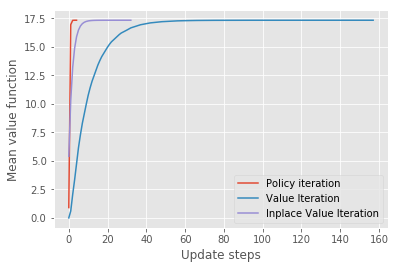

In [13]:
plt.plot(mean_values)
plt.plot(mean_values1)
plt.plot(mean_values2)
plt.legend(['Policy iteration', 'Value Iteration', 'Inplace Value Iteration'])
plt.xlabel('Update steps')
plt.ylabel('Mean value function')

可以看出，相同迭代步数的情况下

- 策略迭代最快
- 值迭代最慢

这是因为策略迭代每次迭代都是在策略评价收敛之后再进行的策略提升，因此每次迭代时，值函数增长的越多

Text(0, 0.5, 'Mean value function')

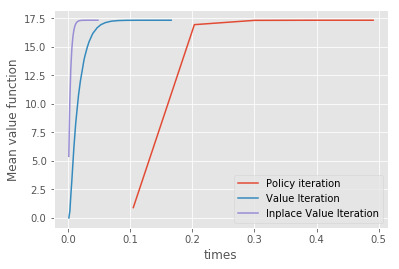

In [14]:
plt.plot(run_times, mean_values)
plt.plot(run_times1, mean_values1)
plt.plot(run_times2, mean_values2)
plt.legend(['Policy iteration', 'Value Iteration', 'Inplace Value Iteration'])
plt.xlabel('times')
plt.ylabel('Mean value function')

可以看出，相同更新时间的情况下：

- Inplace Value Iteration最快
- 值迭代方法快于策略迭代的方法